# Logitic regression on ICAN clinical data

**Objective:** implement a logistic regression model with the ICAN clinical data.

## Library importation

In [1]:
library(finalfit)
library(knitr)
library(pls)
library(forestmodel)


Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings


Loading required package: ggplot2



## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
ican <- ican[,-dim(ican)[2]]
dim(ican)

[1] 2505   28

In [3]:
adjusted_IA_size_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$adjusted_IA_size[i] < 3) {
        adjusted_IA_size_class[i] <- "<3"
    } else if (ican$adjusted_IA_size[i] >= 3) {
        adjusted_IA_size_class[i] <- ">=3"
    } else {
        adjusted_IA_size_class[i] <- "Other"
    }
}
ican["adjusted_IA_size"] <- as.factor(adjusted_IA_size_class)

In [4]:
age_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$age[i] < 50) {
        age_class[i] <- "<50"
    } else if (ican$age[i] < 60) {
        age_class[i] <- "50-59"
    } else if (ican$age[i] < 70) {
        age_class[i] <- "60-69"
    } else if (ican$age[i] >= 70) {
        age_class[i] <- ">=70"
    } else {
        age_class[i] <- "Other"
    }
}
ican["age"] <- as.factor(age_class)

In [5]:
ican$IA_location <- factor(as.character(ican$IA_location), levels = c("ICA", "MCA", "ACA", "PCA"))
ican$tobacco <- factor(as.character(ican$tobacco), levels = c("Non-smoker", "Little_smoker", "Regular_smoker"))
ican$adjusted_IA_size <- factor(as.character(ican$adjusted_IA_size), levels = c("<3", ">=3"))
ican$age <- factor(as.character(ican$age), levels = c("<50", "50-59", "60-69", ">=70"))

## Univariable Logistic Regression

In [6]:
dependent <- "rupture"
explanatory <- colnames(ican[,-dim(ican)[2]])
res_glm_uni <- ican %>%
    glmuni(dependent, explanatory) %>% 
    fit2df(estimate_suffix=" (univariate)")
kable(res_glm_uni,row.names=FALSE, align=c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory                            |OR (univariate)           |
|:--------------------------------------|:-------------------------|
|sexM                                   |0.93 (0.78-1.12, p=0.443) |
|age50-59                               |0.99 (0.81-1.20, p=0.890) |
|age60-69                               |0.98 (0.79-1.22, p=0.890) |
|age>=70                                |1.22 (0.90-1.66, p=0.204) |
|bmi                                    |1.00 (0.98-1.02, p=0.863) |
|sporadic_caseYes                       |1.03 (0.84-1.27, p=0.781) |
|multiple_IAYes                         |1.04 (0.87-1.23, p=0.681) |
|IA_locationMCA                         |0.98 (0.78-1.22, p=0.827) |
|IA_locationACA                         |1.04 (0.84-1.29, p=0.731) |
|IA_locationPCA                         |0.97 (0.76-1.25, p=0.829) |
|adjusted_IA_size>=3                    |0.96 (0.81-1.14, p=0.669) |
|tobaccoLittle_smoker                   |1.08 (0.89-1.32, p=0.413) |
|tobaccoRegular_smoker          

## Multivariables Logistic Regression

In [7]:
fit <- glm(rupture ~ sex + age + tobacco + hta + IA_location + adjusted_IA_size + multiple_IA + headaches + statin_ttt
                      + platelet_aggregation_inhibiting_ttt + hormone_therapy_ttt + allergy, 
           family = binomial, data = ican)

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
"Unable to resize forest panel to be smaller than its heading; consider a smaller text size"
Warning message:
"Ignoring unknown aesthetics: x"


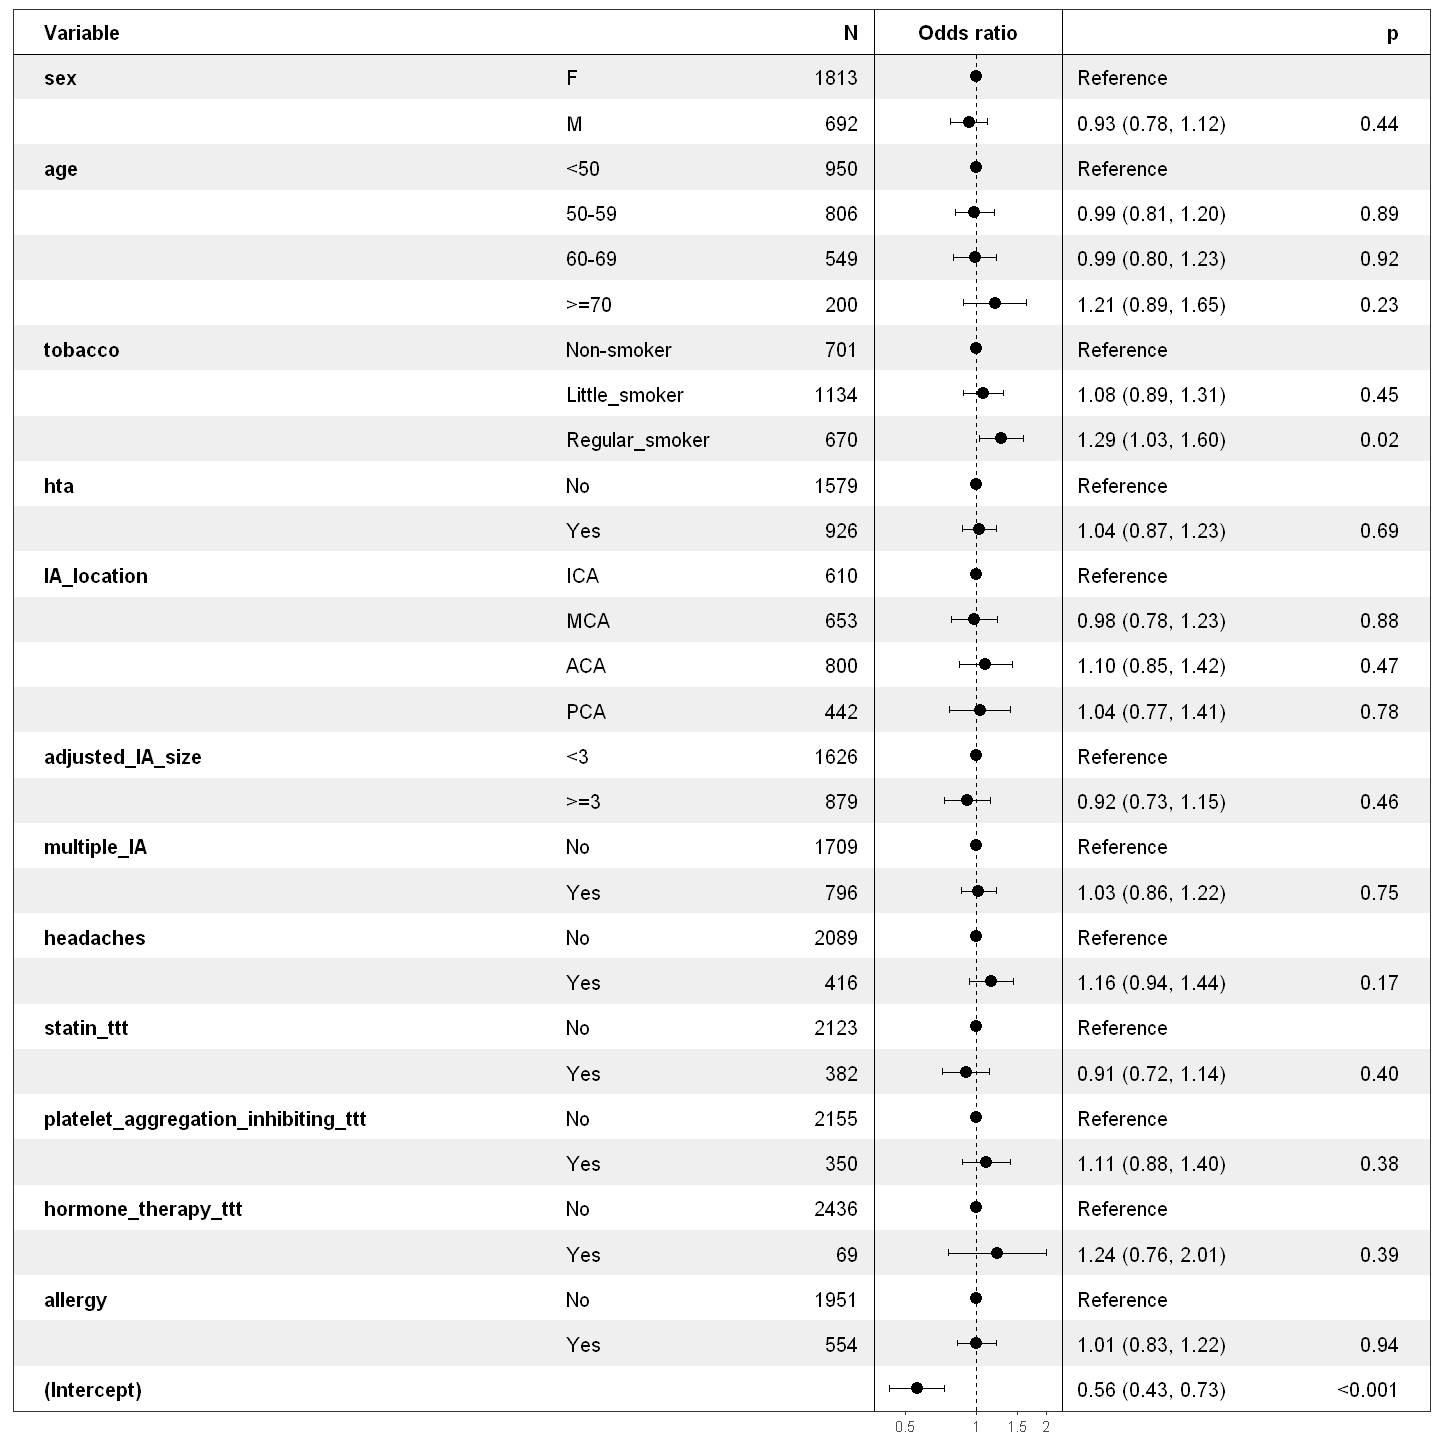

In [8]:
options(repr.plot.width = 12, repr.plot.height = 12)
forest_model(fit, format_options = list(colour = "black", shape = 20, text_size = 5, banded = TRUE))

In [9]:
Odds <- as.vector(round(exp(coef(fit)),2))
CILow <- as.vector(round(exp(confint(fit)),2)[,1])
CIHigh <- as.vector(round(exp(confint(fit)),2)[,2])

Waiting for profiling to be done...

Waiting for profiling to be done...



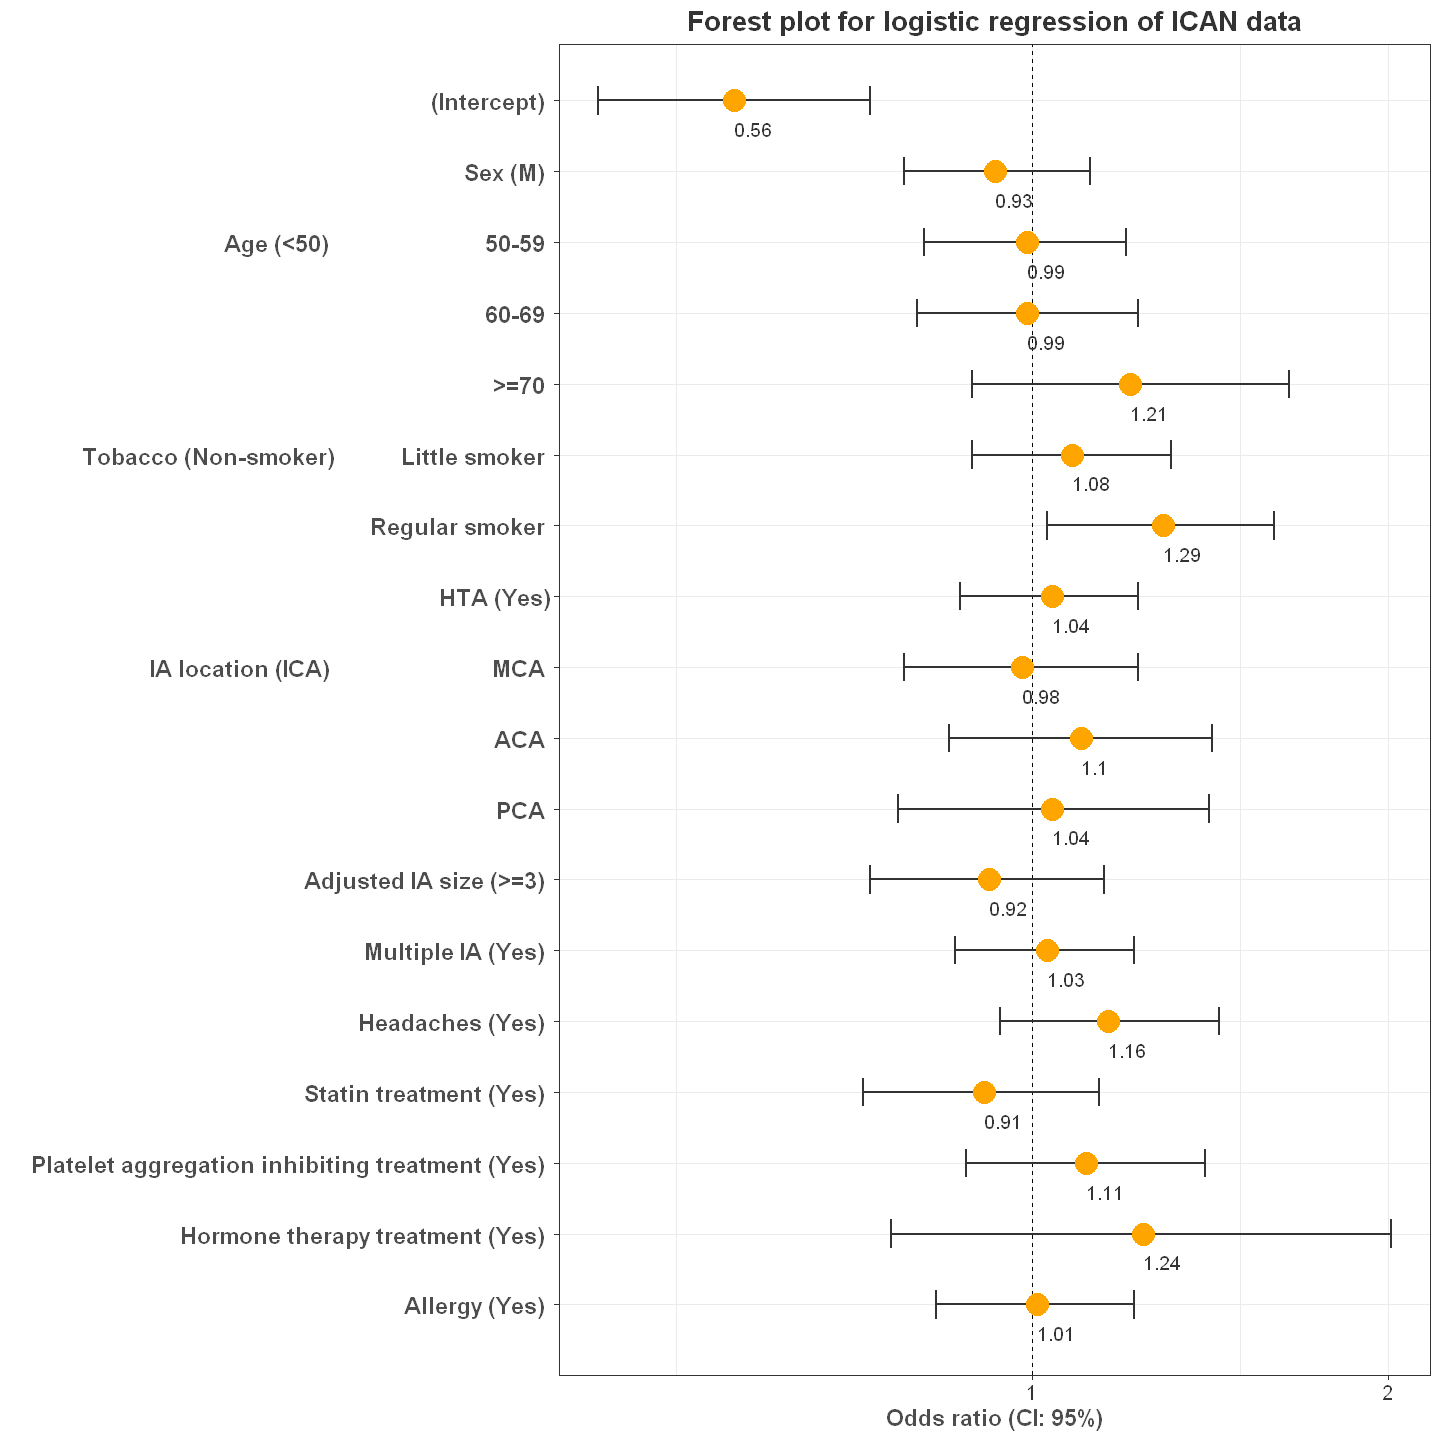

In [10]:
boxLabels = c("(Intercept) ", "Sex (M) ", "Age (<50)                          50-59 ", "60-69 ", ">=70 ", 
              "Tobacco (Non-smoker)           Little smoker ", "Regular smoker ", 
              "HTA (Yes)" , "IA location (ICA)                           MCA ", "ACA ", "PCA ", 
              "Adjusted IA size (>=3) ", "Multiple IA (Yes) ", "Headaches (Yes) ", 
              "Statin treatment (Yes) ", "Platelet aggregation inhibiting treatment (Yes) ", 
              "Hormone therapy treatment (Yes) ", "Allergy (Yes) ")

df <- data.frame(yAxis = length(boxLabels):1,
                 boxOdds = Odds,
                 boxCILow = CILow,
                 boxCIHigh = CIHigh)

# Plot
options(repr.plot.width = 12, repr.plot.height = 12)
p <- ggplot(df, aes(x = boxOdds, y = reorder(boxLabels, yAxis)))

p + geom_vline(aes(xintercept = 1), size = .25, linetype = "dashed") +
  geom_errorbarh(aes(xmax = boxCIHigh, xmin = boxCILow), size = 0.7, 
                 height = .4, color = "gray20") +
  geom_point(size = 6, color = "orange") +
  theme_bw()  +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8)) +
  coord_trans(x = "log10") +
  ylab("") +
  xlab("Odds ratio (CI: 95%)") +
  annotate(geom = "text", y =17.6, x = Odds[1], label = Odds[1], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =16.6, x = Odds[2], label = Odds[2], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =15.6, x = Odds[3], label = Odds[3], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =14.6, x = Odds[4], label = Odds[4], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =13.6, x = Odds[5], label = Odds[5], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =12.6, x = Odds[6], label = Odds[6], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =11.6, x = Odds[7], label = Odds[7], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =10.6, x = Odds[8], label = Odds[8], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =9.6, x = Odds[9], label = Odds[9], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =8.6, x = Odds[10], label = Odds[10], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =7.6, x = Odds[11], label = Odds[11], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =6.6, x = Odds[12], label = Odds[12], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =5.6, x = Odds[13], label = Odds[13], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =4.6, x = Odds[14], label = Odds[14], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =3.6, x = Odds[15], label = Odds[15], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =2.6, x = Odds[16], label = Odds[16], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =1.6, x = Odds[17], label = Odds[17], size = 4, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =0.6, x = Odds[18], label = Odds[18], size = 4, hjust = 0, col = "gray20") +

  ggtitle("Forest plot for logistic regression of ICAN data") +
  theme(plot.title = element_text(face = "bold", colour = "gray20", size = 16, hjust = 0.5),
        axis.title.x = element_text(colour = "gray30", size = 14, face = "bold"),
        axis.text.y = element_text(color="gray30", size=14, face = "bold"),
        axis.text.x = element_text(color="gray20", size=12))